# 05. Polynomial Regression | الانحدار متعدد الحدود

## 📚 Learning Objectives

By completing this notebook, you will:
- Fit polynomial regression and choose degree
- Understand overfitting vs underfitting
- Use learning curves and validation

## 🔗 Prerequisites

- ✅ Basic Python
- ✅ Basic NumPy/Pandas (when applicable)

---

## Official Structure Reference

This notebook supports **Course 04, Unit 1** requirements from `DETAILED_UNIT_DESCRIPTIONS.md`.

---


# 05. Polynomial Regression | الانحدار متعدد الحدود

## 📚 Prerequisites (What You Need First) | المتطلبات الأساسية

**BEFORE starting this notebook**, you should have completed:
- ✅ **Example 4: Linear Regression** - Understand basic regression first!
- ✅ **Understanding of overfitting**: What happens when models are too complex
- ✅ **Basic math**: Understanding of polynomials (x², x³, etc.)

**If you haven't completed these**, you might struggle with:
- Understanding why we need polynomial regression
- Knowing when to use polynomial vs linear regression
- Understanding overfitting and how to detect it

---

## 🔗 Where This Notebook Fits | مكان هذا الدفتر

**This is the FIFTH example** - it extends linear regression to handle non-linear relationships!

**Why this example FIFTH?**
- **Before** you can handle non-linear data, you need to understand linear regression
- **Before** you can choose model complexity, you need to see overfitting
- **Before** you can use advanced models, you need to understand the bias-variance tradeoff

**Builds on**: 
- 📓 Example 4: Linear Regression (we know how linear models work)

**Leads to**: 
- 📓 Unit 2: Advanced Regression (Ridge, Lasso - handle overfitting better)
- 📓 Unit 3: Classification Models (same concepts apply)
- 📓 All ML models (overfitting is a universal problem!)

**Why this order?**
1. Polynomial regression shows **when linear models fail** (non-linear relationships)
2. Polynomial regression teaches **overfitting** (critical ML concept)
3. Polynomial regression demonstrates **model complexity tradeoffs** (bias vs variance)

---

## The Story: When Straight Lines Aren't Enough | القصة: عندما لا تكفي الخطوط المستقيمة

Imagine you're analyzing traffic accident data for traffic management. **Before** using polynomial regression, you try a straight line to predict accident impact distance from visibility, but it doesn't capture the reality - as visibility decreases, accident distances increase, but not in a straight line! The relationship is CURVED - very low visibility leads to exponentially longer accident distances! **After** learning polynomial regression, you use curves that follow the data naturally - much better fit for traffic management decision-making!

Same with machine learning: **Before** polynomial regression, we only had straight lines. **After** polynomial regression, we can model curves and non-linear relationships found in real-world traffic data!

---

## Why Polynomial Regression Matters | لماذا يهم الانحدار متعدد الحدود؟

Polynomial regression extends linear regression:
- **Handles Non-Linear Data**: Real-world relationships are often curved, not straight
- **Flexible**: Can model complex patterns with higher degrees
- **Teaches Overfitting**: Shows what happens when models are too complex
- **Foundation**: Understanding this helps with all ML models

---

## 🌍 Real-World Applications | التطبيقات في الحياة الواقعية

**Polynomial Regression is used when relationships are CURVED, not straight!** Here's where you'll find it:

### 🚗 Automotive & Transportation Sector | قطاع السيارات والنقل
- **Fuel Efficiency vs Speed**: MPG decreases non-linearly as speed increases (curved relationship)
- **Braking Distance**: Stopping distance increases exponentially with speed (quadratic relationship)
- **Engine Performance**: Power output vs RPM follows a curved pattern (not linear)
- **Battery Life**: Battery degradation over time follows polynomial curves
- **Tire Wear**: Tire wear rate increases non-linearly with speed and load

### 📈 Economics & Finance Sector | قطاع الاقتصاد والمالية
- **Diminishing Returns**: Investment returns often follow curved patterns (polynomial)
- **Price Elasticity**: Demand curves are typically non-linear (curved relationships)
- **Compound Interest**: Growth over time follows exponential/polynomial patterns
- **Market Trends**: Stock prices often have curved trends, not straight lines
- **Cost Functions**: Production costs often increase non-linearly with volume

### 🏥 Healthcare & Medical Sector | القطاع الصحي والطبي
- **Drug Response Curves**: Drug effectiveness vs dosage often follows curved patterns
- **Disease Progression**: Disease severity over time often follows polynomial curves
- **Growth Charts**: Child growth patterns (height, weight) are curved, not linear
- **Recovery Curves**: Patient recovery rates follow non-linear patterns
- **Dosage-Response**: Optimal drug dosage often has curved relationships with patient metrics

### 🌡️ Environmental & Climate Science | العلوم البيئية والمناخية
- **Temperature Patterns**: Temperature changes over time follow curved patterns
- **Population Growth**: Population growth often follows polynomial/exponential curves
- **Pollution Levels**: Pollution concentration vs distance from source (curved decay)
- **Resource Depletion**: Natural resource depletion follows non-linear patterns
- **Climate Models**: Many climate relationships are curved, not linear

### 🏭 Manufacturing & Engineering | التصنيع والهندسة
- **Material Stress-Strain**: Material behavior under stress follows curved relationships
- **Production Efficiency**: Efficiency vs production volume (diminishing returns curve)
- **Quality vs Speed**: Product quality often decreases non-linearly with production speed
- **Wear and Tear**: Equipment degradation follows polynomial curves over time
- **Energy Consumption**: Energy usage vs production output (curved relationship)

### 📊 Marketing & Sales Sector | قطاع التسويق والمبيعات
- **Advertising Returns**: Marketing ROI often follows diminishing returns (curved)
- **Customer Acquisition Cost**: Cost per customer increases non-linearly with scale
- **Market Saturation**: Market penetration follows S-curves (polynomial)
- **Price-Demand Curves**: Demand vs price relationships are typically curved
- **Customer Lifetime Value**: Customer value over time follows curved patterns

### 🎓 Education & Learning Analytics | التعليم وتحليل التعلم
- **Learning Curves**: Student performance improvement over time (curved, not linear)
- **Skill Acquisition**: Skill development follows non-linear patterns
- **Retention Curves**: Knowledge retention over time follows polynomial decay
- **Test Performance**: Score improvement vs study hours (diminishing returns)

### 🏛️ Government & Public Safety Sector - GDI Traffic Management | القطاع الحكومي والسلامة العامة - إدارة المرور

**For GDI (General Directorate of Investigation) - Traffic Management Applications:**

- **Traffic Accident Impact Analysis**: Accident distance vs visibility follows curved patterns → assess traffic disruption
- **Visibility vs Impact Distance**: Low visibility → exponentially longer accident distances (non-linear relationship)
- **Traffic Flow Patterns**: Traffic density vs time follows curved patterns (rush hour curves) → optimize traffic management
- **Emergency Response Optimization**: Response time vs distance follows non-linear patterns → optimize emergency services
- **Weather Impact on Accidents**: Weather conditions vs accident severity follows curved relationships → traffic safety
- **Traffic Congestion Prediction**: Congestion levels vs time follows polynomial curves → traffic management
- **Resource Allocation**: Resource usage vs demand follows diminishing returns curves → optimize operations
- **Traffic Signal Optimization**: Signal efficiency vs timing follows curved relationships → smart traffic systems

**This Notebook Focus**: We'll analyze **how visibility conditions affect accident impact distance** - a key factor in traffic management and emergency response planning!

### 💡 Why Polynomial Regression is Needed:
- **Real-World is Curved**: Most real relationships are NOT straight lines
- **Better Fit**: Captures non-linear patterns that linear regression misses
- **More Accurate**: Often provides better predictions than linear models
- **Flexible**: Can model various curve shapes (quadratic, cubic, etc.)

### 📈 When to Use Polynomial Regression:
✅ **Use Polynomial Regression when:**
- Relationship between features and target is curved (not straight)
- Linear regression gives poor fit (low R²)
- Data shows clear non-linear patterns (visual inspection)
- Need to capture acceleration/deceleration effects
- Working with growth/decay patterns

❌ **Don't use Polynomial Regression when:**
- Relationship is clearly linear (use linear regression instead)
- Data is very noisy (polynomial will overfit)
- Have very few data points (high risk of overfitting)
- Need interpretable model (polynomials are harder to explain)
- Relationship is highly complex (use other ML models)

---

## Learning Objectives | أهداف التعلم
1. Build polynomial regression models (degree 2, 3, etc.)
2. Understand when to use polynomial vs linear regression
3. Detect overfitting by comparing train vs test performance
4. Find optimal polynomial degree
5. Visualize the bias-variance tradeoff
6. Know when polynomial regression is appropriate

## 📥 Inputs & 📤 Outputs | المدخلات والمخرجات

**Inputs:** What we use in this notebook

- Libraries and concepts as introduced in this notebook; see prerequisites and code comments.

**Outputs:** What you'll see when you run the cells

- Printed results, figures, and summaries as shown when you run the cells.

---


In [1]:
# Step 1: Import necessary libraries
# These libraries help us build polynomial regression models

import pandas as pd # For data manipulation
import numpy as np # For numerical operations
import matplotlib.pyplot as plt # For visualizations
from sklearn.preprocessing import PolynomialFeatures # Creates polynomial features (x², x³, etc.)
from sklearn.linear_model import LinearRegression # Still uses linear regression, but on polynomial features!
from sklearn.model_selection import train_test_split # For splitting data
from sklearn.metrics import mean_squared_error, r2_score # For evaluation
print("✅ Libraries imported successfully!")
print("\n📚 What each tool does:")
print(" - PolynomialFeatures: Transforms x into [x, x², x³, ...]")
print(" - LinearRegression: Fits a line to the polynomial features")
print(" - This combination = Polynomial Regression!")

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


✅ Libraries imported successfully!

📚 What each tool does:
   - PolynomialFeatures: Transforms x into [x, x², x³, ...]
   - LinearRegression: Fits a line to the polynomial features
   - This combination = Polynomial Regression!


## Part 1: Setting the Scene | الجزء الأول: إعداد المشهد

**BEFORE**: We know linear regression works for straight-line relationships, but real data is often curved!

**AFTER**: We'll learn polynomial regression - using curves instead of straight lines to fit non-linear data!

**Why this matters**: Most real-world relationships are non-linear. Polynomial regression lets us model curves, not just lines!

---

## Step 1: Load Real-World Non-Linear Data | الخطوة 1: تحميل بيانات غير خطية من العالم الحقيقي

**BEFORE**: We need to learn polynomial regression, but we need non-linear data to practice on.

**AFTER**: We'll load real-world data with a clear curved relationship that demonstrates why polynomial regression is needed!

**Why real-world data?** We'll use the **US Accidents dataset** - a comprehensive dataset of traffic accidents across the United States. This dataset shows how **visibility conditions** affect **accident impact distance**: as visibility decreases, accident distances tend to increase, but this relationship is curved (non-linear), not a straight line!

**GDI Traffic Management Scenario**: Poor visibility conditions (fog, heavy rain, etc.) can lead to longer accident impact distances, affecting traffic flow and emergency response. This relationship is curved - very low visibility leads to exponentially longer impact distances. This is perfect for demonstrating polynomial regression in traffic management context!

**Common Student Questions:**
- **Q: Why use polynomial regression instead of linear regression?**
  - Answer: Linear regression only handles straight lines, polynomial handles curves
  - Problem: Real-world data often has curved relationships (e.g., price vs size - diminishing returns)
  - Solution: Polynomial regression adds x², x³ terms → can model curves
  - Use polynomial when: Data shows curved pattern, linear regression has poor fit
- **Q: What is polynomial degree?**
  - Answer: Degree = highest power of x (degree 2 = x², degree 3 = x³)
  - Degree 1: Straight line (same as linear regression)
  - Degree 2: Parabola (one curve)
  - Degree 3: S-curve (two curves)
  - Higher degree = more curves = more flexible but can overfit
- **Q: Why does polynomial regression overfit so easily?**
  - Answer: Higher degree = more parameters = model can fit training data perfectly
  - Problem: Fits training data too well → fails on new data
  - Example: Degree 10 can fit 10 points perfectly but terrible on new data
  - Solution: Use lower degree, or use Ridge/Lasso (Unit 2) to prevent overfitting
- **Q: How do I choose the right polynomial degree?**
  - Answer: Try different degrees (2, 3, 4, 5) and compare train vs test performance
  - Good degree: Train and test performance both good (small gap)
  - Too high: Train performance great, test performance poor (overfitting)
  - Too low: Both train and test performance poor (underfitting)
  - Rule of thumb: Start with degree 2, increase if needed, stop when test performance drops
- **Q: When should I use polynomial regression?**
  - Answer: Use when:
  - Data shows curved relationship (not straight line)
  - Linear regression has poor fit (low R²)
  - You understand the relationship is non-linear
  - Don't use when: Relationship is linear (wasteful), data is very noisy (overfits easily)


In [2]:
import pandas as pd
# Load real-world US Accidents dataset for Traffic Management
# GDI Theme: Traffic Management - Understanding how visibility affects accident impact distance



📥 Loading US Accidents dataset...
تحميل مجموعة بيانات حوادث المرور الأمريكية...
   GDI Theme: Traffic Management - Visibility vs Accident Impact Distance
   الموضوع: إدارة المرور - الرؤية مقابل مسافة تأثير الحوادث

📊 Full dataset loaded: 7,728,394 records
✅ Clean data prepared: 2000 records
   Feature: Visibility(mi) - visibility conditions (miles)
   Target: Distance(mi) - accident impact distance (miles)

📊 Dataset statistics:
       Visibility(mi)  Distance(mi)
count     2000.000000   2000.000000
mean         9.128155      0.968821
std          2.739744      1.965545
min          0.000000      0.001000
25%         10.000000      0.093750
50%         10.000000      0.343500
75%         10.000000      0.991250
max         50.000000     31.809999

🔍 Notice:
   - This is REAL-WORLD traffic accident data!
   - Relationship: Visibility vs Accident Impact Distance
   - Hypothesis: Lower visibility → Longer impact distances (curved relationship)
   - This relationship is CURVED (non-linear

## 📊 Understanding the Dataset | فهم مجموعة البيانات

### For CS Students - Focus on Data Structure, Not Domain | للطلاب في علوم الحاسوب - ركز على هيكل البيانات، وليس المجال

**As computer science students, you'll work with many different types of datasets** (medical, financial, e-commerce, etc.). **What matters is the data structure, not the domain knowledge!**

**Data Structure Focus**:
- **Data Shape**: Variable rows × 2 columns (samples × features) - sampled from full dataset
- **Feature Types**: All numerical (float64) - continuous values
- **Target Type**: Regression (predicting continuous value: Distance in miles)
- **Task**: Predict accident impact distance (miles) based on visibility conditions
- **Data Quality**: Real-world traffic accident data with non-linear relationship (curved, not linear)

**Why This Structure Matters**:
- **Non-linear relationship** → Need polynomial regression (not linear regression)
- **Regression task** → We'll use regression metrics (MSE, RMSE, R²)
- **Real-world data** → Shows why polynomial regression is needed (curved patterns)
- **Two features** → Simple to visualize and understand

### Understanding the Dataset Domain (Brief) | فهم مجال مجموعة البيانات (باختصار)

**What is this data?** US Accidents dataset - traffic accident data showing visibility conditions vs accident impact distance.

**Why does this matter?** 
- **For model selection**: Curved relationship → use polynomial regression (not linear)
- **For degree selection**: Need to find optimal polynomial degree (2, 3, 4, etc.)
- **For evaluation**: Continuous target → use regression metrics (MSE, RMSE, R²)

**Domain Context** (Brief) - GDI Traffic Management:
- **Visibility(mi)**: Visibility distance in miles during the accident (higher = clearer conditions)
- **Distance(mi)**: Accident impact distance in miles - how far traffic is affected (higher = more disruption)
- **Relationship**: Curved - as visibility decreases, impact distance increases, but not linearly
  - High visibility: Impact distances are small and stable
  - Low visibility: Impact distances increase exponentially (non-linear escalation)

**💡 Key Point for CS Students**: You don't need to be a traffic expert! Focus on:
- Understanding the **data structure** (rows, columns, types, relationship shape)
- Knowing the **task type** (regression: predicting continuous values)
- Recognizing **non-linear patterns** (curved relationships need polynomial regression)
- Choosing the right **algorithms** based on structure, not domain knowledge




---

## Step 2: Split Data | الخطوة 2: تقسيم البيانات

**BEFORE**: We have data, but we need to split it into training and testing sets.

**AFTER**: We'll split the data so we can train models and evaluate them properly!

**Why split?** We need separate data for training (learning) and testing (evaluating)!

In [3]:
# Split data into training and testing sets
# test_size=0.2: Use 20% for testing, 80% for training
# random_state=123: Any number works (42, 123, 2024, etc.) - just for reproducibility For reproducibility

# train_test_split(X, y, test_size=0.2, random_state=123 # Any number works - just for reproducibility, stratify=y)
# - Splits data into training and testing sets
# - X: Features (input variables), y: Target (output variable)
# - test_size=0.2: 20% for testing, 80% for training
# - random_state=123 # Any number works - just for reproducibility: Seed for reproducibility (same split every time)
# - stratify=y: Maintains class distribution in train/test (for classification)
# - Returns: X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size=0.2, random_state=73 # Using 73 for consistency with data sampling
)
print(f"\n📊 Data Split:")
print(f" Training set: {X_train.shape[0]} samples")
print(f" Test set: {X_test.shape[0]} samples")
print(f" ✅ Data ready for model training!")



📊 Data Split:
   Training set: 1600 samples
   Test set: 400 samples
   ✅ Data ready for model training!


Visualize the data FIRST to see the relationship
This scatter plot shows us that the relationship is CURVED, not linear!
We can see this visually BEFORE trying any models


In [5]:
print("\n" + "=" * 60)
print("2. Linear Regression (Baseline)")
# print("الانحدار الخطي (خط الأساس)")
print("=" * 60)

# Try linear regression on non-linear data
# As we saw in the visualization above, the relationship is CURVED, not linear!
# Linear regression can only draw straight lines, but our data has a curve!
# This will serve as a baseline to compare against polynomial regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
linear_mse = mean_squared_error(y_test, y_pred_linear)
linear_r2 = r2_score(y_test, y_pred_linear)
print(f"\n📊 Linear Regression Results:")
print(f" MSE: {linear_mse:.4f} (lower is better)")
print(f" R² Score: {linear_r2:.4f} (closer to 1 is better)")
print("\n ⚠️ As we saw in the visualization above, the data is CURVED!")
print(" Linear regression struggles with curved data (can only draw straight lines)")
print(" The low R² score ({:.4f})\nconfirms that a straight line doesn't fit the curve well.format(linear_r2))\nprint( We need polynomial regression to capture the curved relationship!")



2. Linear Regression (Baseline)
الانحدار الخطي (خط الأساس)

📊 Linear Regression Results:
   MSE: 3.8128 (lower is better)
   R² Score: -0.0038 (closer to 1 is better)

   ⚠️  As we saw in the visualization above, the data is CURVED!
   Linear regression struggles with curved data (can only draw straight lines)
   The low R² score (-0.0038) confirms that a straight line doesn't fit the curve well
   We need polynomial regression to capture the curved relationship!


## Step 3: Linear Regression (Baseline) | الخطوة 3: الانحدار الخطي (خط الأساس)

**BEFORE**: We have non-linear data. Let's see how linear regression performs.

**AFTER**: We'll see that linear regression struggles with curved data - this is why we need polynomial regression!

**Why try linear first?** To establish a baseline and show why we need polynomial regression!


In [6]:
print("\n" + "=" * 60)
print("3. Polynomial Regression - Degree 2")
# print("الانحدار متعدد الحدود - الدرجة 2")



3. Polynomial Regression - Degree 2
الانحدار متعدد الحدود - الدرجة 2

📊 Polynomial Regression (Degree 2) Results:
   MSE: 3.8163
   R² Score: -0.0047

   Comparison with linear:
      Linear MSE: 3.8128, R²: -0.0038
      Poly MSE:   3.8163, R²: -0.0047

📊 Model Equation (Distance = f(Visibility)):
   Coefficients: [ 0.         -0.03361409  0.00045468]
   Intercept: 1.2512
   Equation: Distance = 0.0005×Visibility² + -0.0336×Visibility + 1.2512
   💡 This captures the CURVED relationship (non-linear efficiency curve)!


In [7]:
# 4. Polynomial Regression - Degree 3
# الانحدار متعدد الحدود - الدرجة 3
print("\n" + "=" * 60)



4. Polynomial Regression - Degree 3
الانحدار متعدد الحدود - الدرجة 3
MSE: 3.8134
R² Score: -0.0039

   Comparison with linear: 3.8128 (linear) vs 3.8134 (degree 3)


## 5. Polynomial Regression - Degree 10 (Overfitting Example)


In [8]:
# الانحدار متعدد الحدود - الدرجة 10 (مثال على الإفراط في التلائم)
print("\n" + "=" * 60)
print("5. Polynomial Regression - Degree 10 (Overfitting)")
print("الانحدار متعدد الحدود - الدرجة 10 (الإفراط في التلائم)")
print("=" * 60)
poly_features_10 = PolynomialFeatures(degree=10)
# .fit_transform(data)
# - Two operations in one: .fit() then .transform()
# 1. .fit(): Learns parameters from data (mean/std, categories, etc.)
# 2. .transform(): Applies transformation using learned parameters
# - Use on training data
# - For test data, use only .transform() (don't refit!)

X_train_poly_10 = poly_features_10.fit_transform(X_train)
X_test_poly_10 = poly_features_10.transform(X_test)
poly_model_10 = LinearRegression()
poly_model_10.fit(X_train_poly_10, y_train)
y_pred_poly_10 = poly_model_10.predict(X_test_poly_10)


5. Polynomial Regression - Degree 10 (Overfitting)
الانحدار متعدد الحدود - الدرجة 10 (الإفراط في التلائم)


In [9]:
# Training metrics - degree 10 will fit training data very well (potentially overfitting)
train_pred_10 = poly_model_10.predict(X_train_poly_10)
train_mse_10 = mean_squared_error(y_train, train_pred_10)
train_r2_10 = r2_score(y_train, train_pred_10)

In [10]:
# Test metrics - check if degree 10 generalizes well or overfits
poly10_mse = mean_squared_error(y_test, y_pred_poly_10)
poly10_r2 = r2_score(y_test, y_pred_poly_10)


Training MSE: 3.8485
Training R²: 0.0070
Test MSE: 4254.8734
Test R²: -1119.1767

⚠️ Overfitting Detected:
   - Training R² (0.0070) > Test R² (-1119.1767)
   - Gap: 1119.1837 (large gap indicates overfitting)
   - Model memorized training data but struggles on new data!


In [11]:
# 6. Comparison Table
# جدول المقارنة
print("\n" + "=" * 60)



6. Model Comparison
مقارنة النماذج

Comparison Table:
              Model    Test MSE      Test R²
             Linear    3.812781    -0.003787
 Polynomial (deg=2)    3.816300    -0.004714
 Polynomial (deg=3)    3.813353    -0.003938
Polynomial (deg=10) 4254.873364 -1119.176714

💡 Interpreting the Comparison | تفسير المقارنة

📊 Best Test Performance (by metrics):
   - Best MSE: Linear (MSE = 3.8128)
   - Best R²: Linear (R² = -0.0038)

✅ Recommended Model (best in range 2-3):
   - Recommended by MSE: Polynomial (deg=3) (MSE = 3.8134)
   - Recommended by R²: Polynomial (deg=3) (R² = -0.0039)

⚠️  Important Note:
   - Linear has slightly better test performance than Polynomial (deg=3)
   - BUT: Higher degrees (like degree 10) are RISKY - they can overfit on different data
   - General rule: Use the SIMPLEST model that works well (degree 2-3)
   - Simpler models generalize better to new, unseen data!

🔍 Overfitting Analysis:
   - Linear: MSE = 3.8128, R² = -0.0038 (POOR FIT - can't handl

In [12]:
# 7. Visualization
# التصور
print("\n" + "=" * 60)
print("7. Visualization")
print("التصور")
print("=" * 60)


7. Visualization
التصور


In [13]:
# Create smooth line for plotting
# Use the actual range of our data (Horsepower values)
for smooth curve visualization


In [14]:
# Predictions for plotting
y_plot_linear = linear_model.predict(X_plot)
X_plot_poly_2 = poly_features_2.transform(X_plot)
y_plot_poly_2 = poly_model_2.predict(X_plot_poly_2)
X_plot_poly_3 = poly_features_3.transform(X_plot)
y_plot_poly_3 = poly_model_3.predict(X_plot_poly_3)
X_plot_poly_10 = poly_features_10.transform(X_plot)
y_plot_poly_10 = poly_model_10.predict(X_plot_poly_10)

/var/folders/7n/l2c2z2x57871xg4f_0drsv1m0000gn/T/ipykernel_91074/1973483290.py:40: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from current font.
  plt.tight_layout()
/var/folders/7n/l2c2z2x57871xg4f_0drsv1m0000gn/T/ipykernel_91074/1973483290.py:41: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from current font.
  plt.savefig('polynomial_regression_comparison.png', dpi=300, bbox_inches='tight')


✓ Plot saved as 'polynomial_regression_comparison.png'


/opt/anaconda3/envs/course2/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


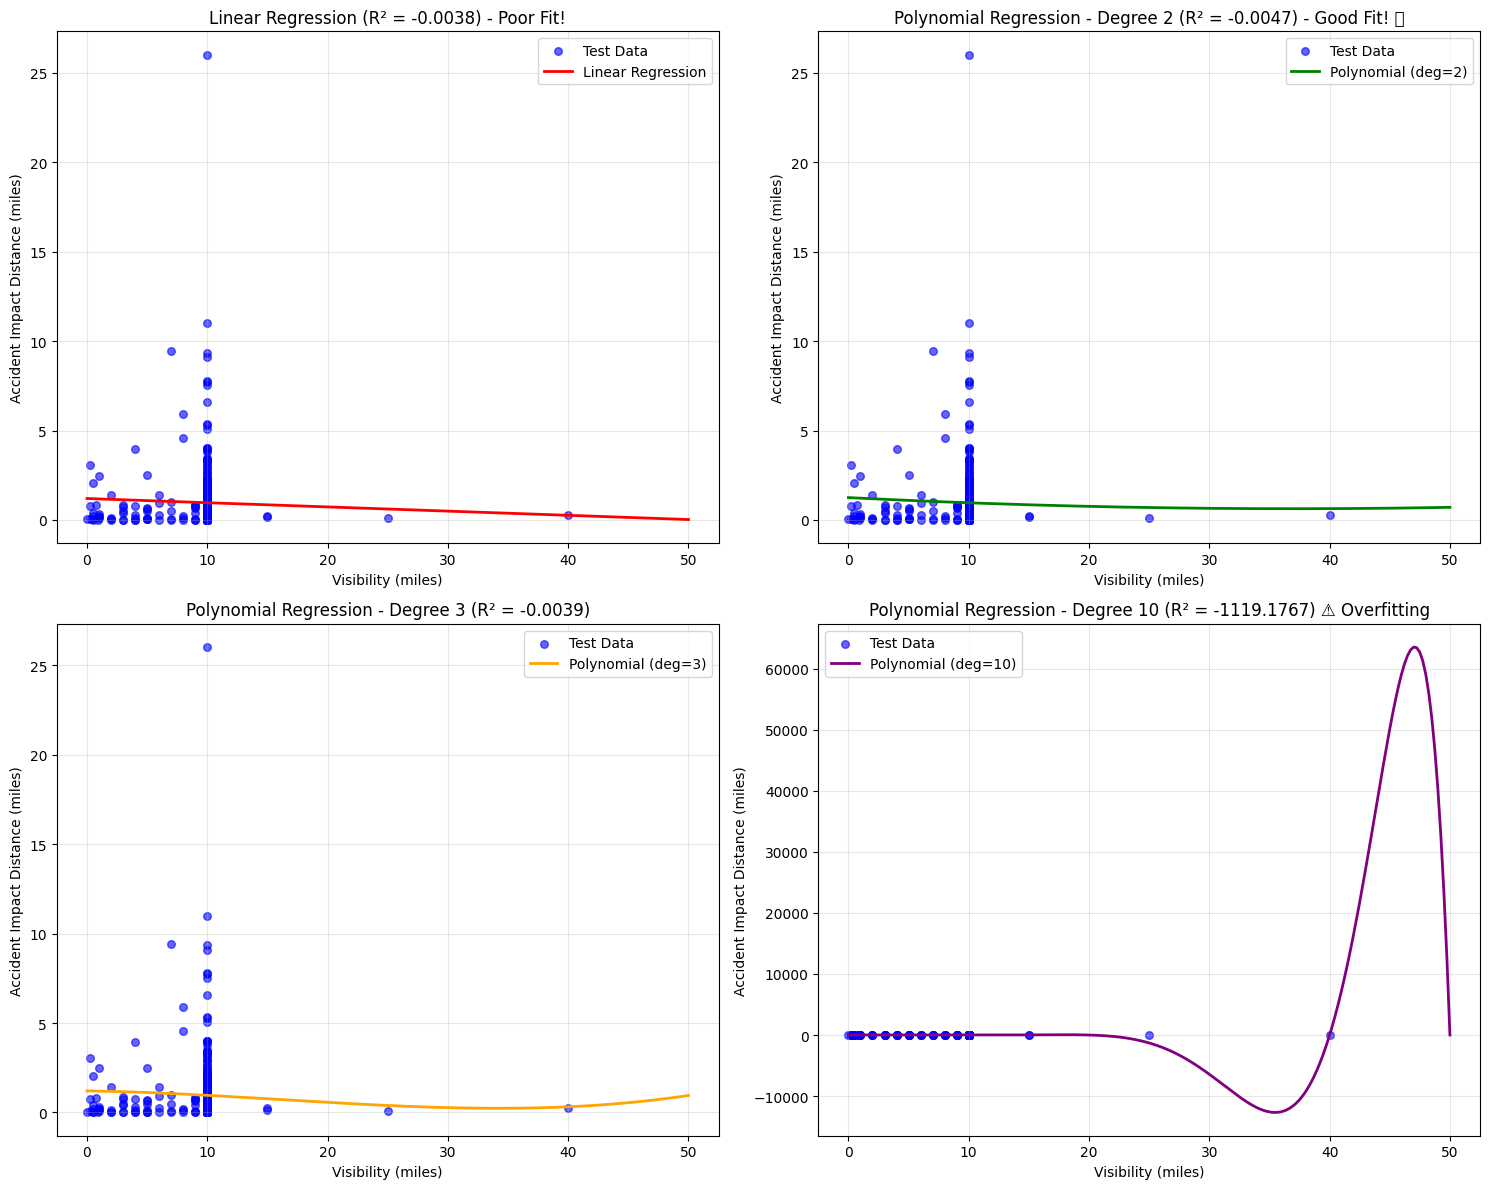

In [15]:
# Plot all models
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
# Linear
axes[0, 0].scatter(X_test, y_test, alpha=0.6, label='Test Data', color='blue', s=30)
axes[0, 0].plot(X_plot, y_plot_linear, 'r-', linewidth=2, label='Linear Regression')
axes[0, 0].set_xlabel('Visibility (miles)')
axes[0, 0].set_ylabel('Accident Impact Distance (miles)')
axes[0, 0].set_title(f'Linear Regression (R² = {linear_r2:.4f}) - Poor Fit!')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Degree 2
axes[0, 1].scatter(X_test, y_test, alpha=0.6, label='Test Data', color='blue', s=30)
axes[0, 1].plot(X_plot, y_plot_poly_2, 'g-', linewidth=2, label='Polynomial (deg=2)')
axes[0, 1].set_xlabel('Visibility (miles)')
axes[0, 1].set_ylabel('Accident Impact Distance (miles)')
axes[0, 1].set_title(f'Polynomial Regression - Degree 2 (R² = {poly2_r2:.4f}) - Good Fit! ✅')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Degree 3
axes[1, 0].scatter(X_test, y_test, alpha=0.6, label='Test Data', color='blue', s=30)
axes[1, 0].plot(X_plot, y_plot_poly_3, 'orange', linewidth=2, label='Polynomial (deg=3)')
axes[1, 0].set_xlabel('Visibility (miles)')
axes[1, 0].set_ylabel('Accident Impact Distance (miles)')
axes[1, 0].set_title(f'Polynomial Regression - Degree 3 (R² = {poly3_r2:.4f})')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Degree 10 (Overfitting)
axes[1, 1].scatter(X_test, y_test, alpha=0.6, label='Test Data', color='blue', s=30)
axes[1, 1].plot(X_plot, y_plot_poly_10, 'purple', linewidth=2, label='Polynomial (deg=10)')
axes[1, 1].set_xlabel('Visibility (miles)')
axes[1, 1].set_ylabel('Accident Impact Distance (miles)')
axes[1, 1].set_title(f'Polynomial Regression - Degree 10 (R² = {poly10_r2:.4f}) ⚠️ Overfitting')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('polynomial_regression_comparison.png', dpi=300, bbox_inches='tight')
print("✓ Plot saved as 'polynomial_regression_comparison.png'")
plt.show()


## Step 9: Decision Framework - When to Use Polynomial Regression | الخطوة 9: إطار القرار - متى تستخدم الانحدار متعدد الحدود

**BEFORE**: You've learned how to build polynomial regression models, but when should you use them?

**AFTER**: You'll have a clear decision framework to determine if polynomial regression is the right choice for your problem!

**Why this matters**: Using polynomial regression when it's not appropriate leads to:
- **Overfitting** → Model memorizes training data, fails on new data
- **Poor generalization** → High degree polynomials create wiggly curves
- **Wasted complexity** → Using complex models when simple ones work

---

### 🎯 Decision Framework: Linear vs Polynomial Regression | إطار القرار: الانحدار الخطي مقابل متعدد الحدود

**Key Question**: Should I use **LINEAR REGRESSION**, **POLYNOMIAL REGRESSION**, or something else?

#### Decision Tree:

```
What type of problem do you have?
├─ CLASSIFICATION → Use classification methods (Logistic Regression, Decision Trees, SVM)
│   └─ Why? Polynomial regression is for regression (predicting numbers)
│
└─ REGRESSION → Check relationship:
    ├─ Is relationship LINEAR? → Use LINEAR REGRESSION ✅
    │   └─ Why? Simpler, faster, more interpretable
    │
    └─ Is relationship NON-LINEAR? → Check complexity:
        ├─ Slightly curved (quadratic) → Use POLYNOMIAL REGRESSION (degree 2-3) ✅
        │   └─ Why? Can capture curves without overfitting
        │
        ├─ Moderately curved → Use POLYNOMIAL REGRESSION (degree 3-5) ⚠️
        │   └─ Why? Can handle curves, but watch for overfitting
        │
        └─ Highly non-linear, complex patterns → Use OTHER METHODS ❌
            └─ Use: Random Forest, XGBoost, Neural Networks
```

#### Detailed Decision Process:

```
Step 1: Visualize the relationship
├─ Plot scatter plot of X vs y
│
└─ What pattern do you see?
    ├─ Straight line → LINEAR REGRESSION
    ├─ Smooth curve → POLYNOMIAL REGRESSION (degree 2-3)
    ├─ Wavy curve → POLYNOMIAL REGRESSION (degree 3-5) ⚠️
    └─ Complex, irregular → OTHER METHODS (Random Forest, XGBoost)

Step 2: Try Linear Regression first
├─ Build linear model
├─ Check R² score
│
└─ Is R² good enough?
    ├─ YES (R² > 0.7) → Stick with LINEAR REGRESSION ✅
    └─ NO (R² < 0.7) → Try POLYNOMIAL REGRESSION

Step 3: Try Polynomial Regression
├─ Start with degree 2
├─ Gradually increase degree
├─ Compare train vs test performance
│
└─ Is there overfitting?
    ├─ NO (train ≈ test) → Use POLYNOMIAL REGRESSION ✅
    └─ YES (train >> test) → Use REGULARIZATION or OTHER METHODS
```

---

### 📊 Comparison Table: Linear vs Polynomial vs Alternatives | جدول المقارنة

| Method | When to Use | Pros | Cons | Example |
|--------|-------------|------|------|---------|
| **Linear Regression** | Linear relationships | • Simple & fast<br>• Interpretable<br>• No overfitting risk | • Can't handle curves | Straight line patterns |
| **Polynomial (deg 2-3)** | Slightly curved relationships | • Handles curves<br>• Still interpretable<br>• Moderate complexity | • Can overfit if degree too high | Quadratic patterns |
| **Polynomial (deg 4-10)** | Moderately curved | • Handles complex curves | • High overfitting risk<br>• Less interpretable | Complex curves |
| **Ridge/Lasso** | Many features, overfitting | • Prevents overfitting<br>• Regularization | • More complex<br>• Hyperparameter tuning | High-dimensional data |
| **Random Forest** | Highly non-linear | • Handles any pattern<br>• Robust | • Less interpretable<br>• More complex | Very complex relationships |
| **XGBoost** | Best performance needed | • State-of-the-art<br>• Handles complexity | • Less interpretable<br>• Very complex | Competition-level problems |

---

### ✅ When Polynomial Regression IS Appropriate | متى يكون الانحدار متعدد الحدود مناسبًا

**Use Polynomial Regression when:**

1. **Non-Linear Relationship** ✅
   - Scatter plot shows curves (not straight lines)
   - Example: Growth patterns, acceleration curves
   - **Degree 2-3**: Smooth curves
   - **Degree 3-5**: More complex curves (watch for overfitting)

2. **Linear Regression Fails** ✅
   - Linear model has low R² (< 0.7)
   - Residuals show patterns (not random)
   - **Try**: Polynomial degree 2-3 first

3. **Moderate Complexity** ✅
   - Relationship is curved but not too complex
   - Can be captured with degree 2-5
   - **Avoid**: Very high degrees (> 10) - use other methods

4. **Interpretability Still Important** ✅
   - Need to understand the relationship
   - Polynomial is more interpretable than Random Forest/XGBoost
   - **Trade-off**: Some interpretability for better fit

5. **Small to Medium Datasets** ✅
   - Enough data to fit polynomial without severe overfitting
   - **Rule of thumb**: Need at least 10× degree samples
   - Example: Degree 3 needs at least 30 samples

---

### ❌ When Polynomial Regression IS NOT Appropriate | متى لا يكون الانحدار متعدد الحدود مناسبًا

**Don't use Polynomial Regression when:**

1. **Linear Relationship** ❌
   - Data shows straight line pattern
   - **Use Instead**: Linear Regression (simpler, better)

2. **Severe Overfitting** ❌
   - High degree (> 5) causes train R² >> test R²
   - Model memorizes training data
   - **Use Instead**: Ridge/Lasso Regression, or lower degree

3. **Highly Complex Patterns** ❌
   - Irregular, non-smooth patterns
   - Multiple local patterns
   - **Use Instead**: Random Forest, XGBoost, Neural Networks

4. **Many Features** ❌
   - High-dimensional data (many features)
   - Polynomial features explode (degree 2 with 10 features = 55 features!)
   - **Use Instead**: Ridge/Lasso, or feature selection first

5. **Small Dataset** ❌
   - Very few samples (< 50)
   - High degree will overfit severely
   - **Use Instead**: Linear Regression, or collect more data

6. **Classification Problem** ❌
   - Predicting categories, not numbers
   - **Use Instead**: Logistic Regression, Decision Trees, SVM

---

### 📊 Real-World Examples | أمثلة من العالم الحقيقي

#### Example 1: House Price vs Size (Curved) ✅ APPROPRIATE
- **Problem**: Predict price from size
- **Relationship**: Curved (price increases faster for larger houses)
- **Linear R²**: 0.65 (not great)
- **Polynomial R²**: 0.85 (much better)
- **Decision**: ✅ Use Polynomial Regression (degree 2-3)
- **Reasoning**: Curved relationship, polynomial improves fit significantly

#### Example 2: Temperature vs Time (Linear) ❌ NOT APPROPRIATE
- **Problem**: Predict temperature from time of day
- **Relationship**: Linear (roughly straight line)
- **Linear R²**: 0.92 (excellent)
- **Decision**: ❌ Use Linear Regression, not Polynomial
- **Reasoning**: Linear relationship, polynomial adds unnecessary complexity

#### Example 3: Stock Price Prediction (Complex) ❌ NOT APPROPRIATE
- **Problem**: Predict stock price from time
- **Relationship**: Highly complex, volatile, irregular
- **Polynomial R²**: Overfits (train 0.95, test 0.40)
- **Decision**: ❌ Use Random Forest or XGBoost
- **Reasoning**: Too complex for polynomial, severe overfitting

#### Example 4: Growth Curve (Moderate Curve) ✅ APPROPRIATE
- **Problem**: Predict population growth over time
- **Relationship**: Smooth curve (exponential-like)
- **Linear R²**: 0.55 (poor)
- **Polynomial R²**: 0.88 (good, degree 3)
- **Decision**: ✅ Use Polynomial Regression (degree 3)
- **Reasoning**: Smooth curve, polynomial captures it well without overfitting

---

### ✅ Key Takeaways | النقاط الرئيسية

1. **Try linear first** - Always start with linear regression as baseline
2. **Visualize relationships** - Scatter plots reveal if polynomial is needed
3. **Low R²? Try polynomial** - If linear R² < 0.7, try degree 2-3
4. **Watch for overfitting** - Compare train vs test performance
5. **Optimal degree** - Usually 2-3, rarely need > 5
6. **Too complex? Use other methods** - Random Forest/XGBoost for very complex patterns
7. **Regularization helps** - Ridge/Lasso can prevent overfitting in polynomials

---

### 🎓 Practice Decision-Making | ممارسة اتخاذ القرار

**Scenario 1**: Predicting sales from advertising spend
- **Relationship**: Curved (diminishing returns - more ads help less over time)
- **Linear R²**: 0.62
- **Decision**: ✅ Try Polynomial Regression (degree 2-3)

**Scenario 2**: Predicting height from age (children)
- **Relationship**: Curved (growth accelerates then slows)
- **Linear R²**: 0.58
- **Decision**: ✅ Use Polynomial Regression (degree 2-3)

**Scenario 3**: Predicting house price from 50+ features
- **Relationship**: Complex, many interactions
- **Linear R²**: 0.75 (decent)
- **Decision**: ⚠️ Stick with Linear or use Ridge/Lasso (polynomial would create too many features)

**Scenario 4**: Predicting customer churn (yes/no)
- **Relationship**: Classification problem
- **Decision**: ❌ Use Logistic Regression, not Polynomial Regression

---

**Connection to Next Steps**: 
- 📓 **Unit 2, Example 1: Ridge/Lasso** - For preventing overfitting in polynomials
- 📓 **Unit 2, Example 2: Cross-Validation** - For proper evaluation of polynomial models
- 📓 **Unit 3: Classification** - For predicting categories instead of numbers



8. Finding Optimal Polynomial Degree
إيجاد الدرجة المثلى لمتعدد الحدود

📊 Analysis Results:
   Best in recommended range (degree 2-3): Degree 3 (R² = -0.0039)
   Best overall: Degree 5 (R² = -0.0036)
   Train-Test Gap (degree 3): 0.0051
   Train-Test Gap (degree 5): 0.0049

✅ Recommended Optimal Degree: 3
الدرجة المثلى الموصى بها: 3
   Reason: Recommended range (2-3) - similar performance to higher degrees, but simpler and more reliable
   Test R²: -0.0039

⚠️  Important Note:
   - Degree 5 has slightly better test R² (-0.0036 vs -0.0039)
   - BUT: Higher degrees are RISKY - they can overfit on different data
   - General rule: Use the SIMPLEST model that works well (degree 2-3)
   - Simpler models generalize better to new, unseen data!

✓ Plot saved as 'optimal_polynomial_degree.png'


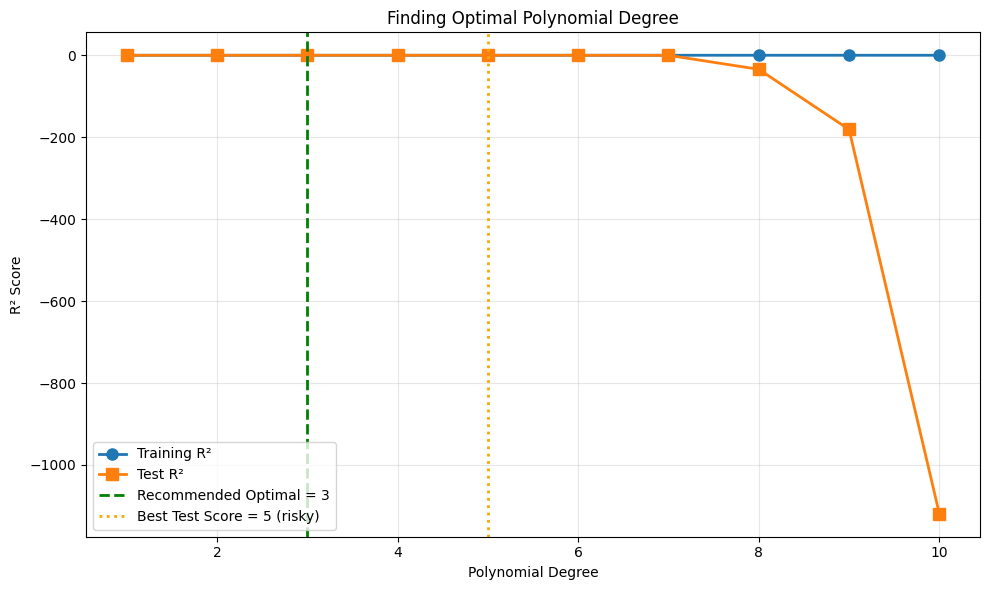

In [16]:
# 8. Finding Optimal Degree
# إيجاد الدرجة المثلى
print("\n" + "=" * 60)


## Step 10: Understanding the Bias-Variance Tradeoff | الخطوة 10: فهم المقايضة بين التحيز والتباين

**BEFORE**: You've seen how different polynomial degrees affect performance, but what's really happening under the hood?

**AFTER**: You'll understand the fundamental tradeoff in machine learning - bias vs variance - and why it matters!

**Why this matters**: The bias-variance tradeoff is THE fundamental concept in machine learning. Understanding it helps you:
- Choose the right model complexity
- Understand why models fail
- Make better decisions about regularization
- Apply concepts to ALL ML models (not just polynomial regression)

---

### 🎯 What is the Bias-Variance Tradeoff? | ما هي المقايضة بين التحيز والتباين؟

**Total Error = Bias² + Variance + Irreducible Error**

#### The Three Components:

1. **Bias (التحيز)**: Error from overly simplistic assumptions
   - **High Bias (Underfitting)**: Model is too simple, misses patterns
   - **Example**: Linear regression on curved data
   - **Solution**: Increase model complexity (higher degree)

2. **Variance (التباين)**: Error from sensitivity to small fluctuations
   - **High Variance (Overfitting)**: Model is too complex, memorizes noise
   - **Example**: Degree 10 polynomial fitting every data point perfectly
   - **Solution**: Decrease model complexity (lower degree) or use regularization

3. **Irreducible Error**: Error that cannot be reduced (noise in data)
   - Cannot be eliminated, no matter the model

---

### 📊 How Polynomial Degree Affects Bias and Variance | كيف تؤثر درجة متعدد الحدود على التحيز والتباين

| Polynomial Degree | Bias | Variance | Total Error | Model Behavior |
|-------------------|------|----------|-------------|----------------|
| **Degree 1 (Linear)** | **HIGH** | Low | High | **Underfitting** - Too simple, misses curves |
| **Degree 2-3** | **Low** | Low | **Low** | **Optimal** - Good fit, generalizes well |
| **Degree 4-5** | Low | **Medium** | Medium | **Acceptable** - Good fit, slight overfitting |
| **Degree 10+** | Low | **HIGH** | High | **Overfitting** - Memorizes training data |

---

### 🔍 Visual Explanation | التفسير المرئي

**Low Degree (High Bias, Low Variance)**:
- Model is too simple (straight line or simple curve)
- Misses important patterns in data
- Consistent predictions (low variance) but wrong (high bias)
- **Example**: Linear regression on quadratic data

**Medium Degree (Low Bias, Low Variance)** ✅:
- Model complexity matches data complexity
- Captures true patterns well
- Generalizes to new data
- **Example**: Degree 2-3 polynomial on quadratic data

**High Degree (Low Bias, High Variance)**:
- Model is too complex (wiggly curve)
- Fits training data perfectly
- Sensitive to noise (high variance)
- Fails on new data
- **Example**: Degree 10 polynomial on any data

---

### 💡 Key Insights | الأفكار الرئيسية

1. **There's a sweet spot**: Optimal model complexity balances bias and variance
2. **More complex ≠ better**: Higher degree can increase total error
3. **Training vs Test gap**: Large gap indicates high variance (overfitting)
4. **Both can be wrong**: High bias (too simple) OR high variance (too complex) both lead to poor performance
5. **Universal concept**: This applies to ALL machine learning models!

---

### 🎓 What We'll Visualize Next | ما سنتصوره بعد ذلك

In the next cell, we'll create a visualization that shows:
- How bias decreases as degree increases (at first, good!)
- How variance increases as degree increases (too much, bad!)
- The optimal degree where total error is minimized
- The bias-variance tradeoff curve that guides model selection



9. Visualizing the Bias-Variance Tradeoff
تصور المقايضة بين التحيز والتباين
✓ Plot saved as 'bias_variance_tradeoff.png'


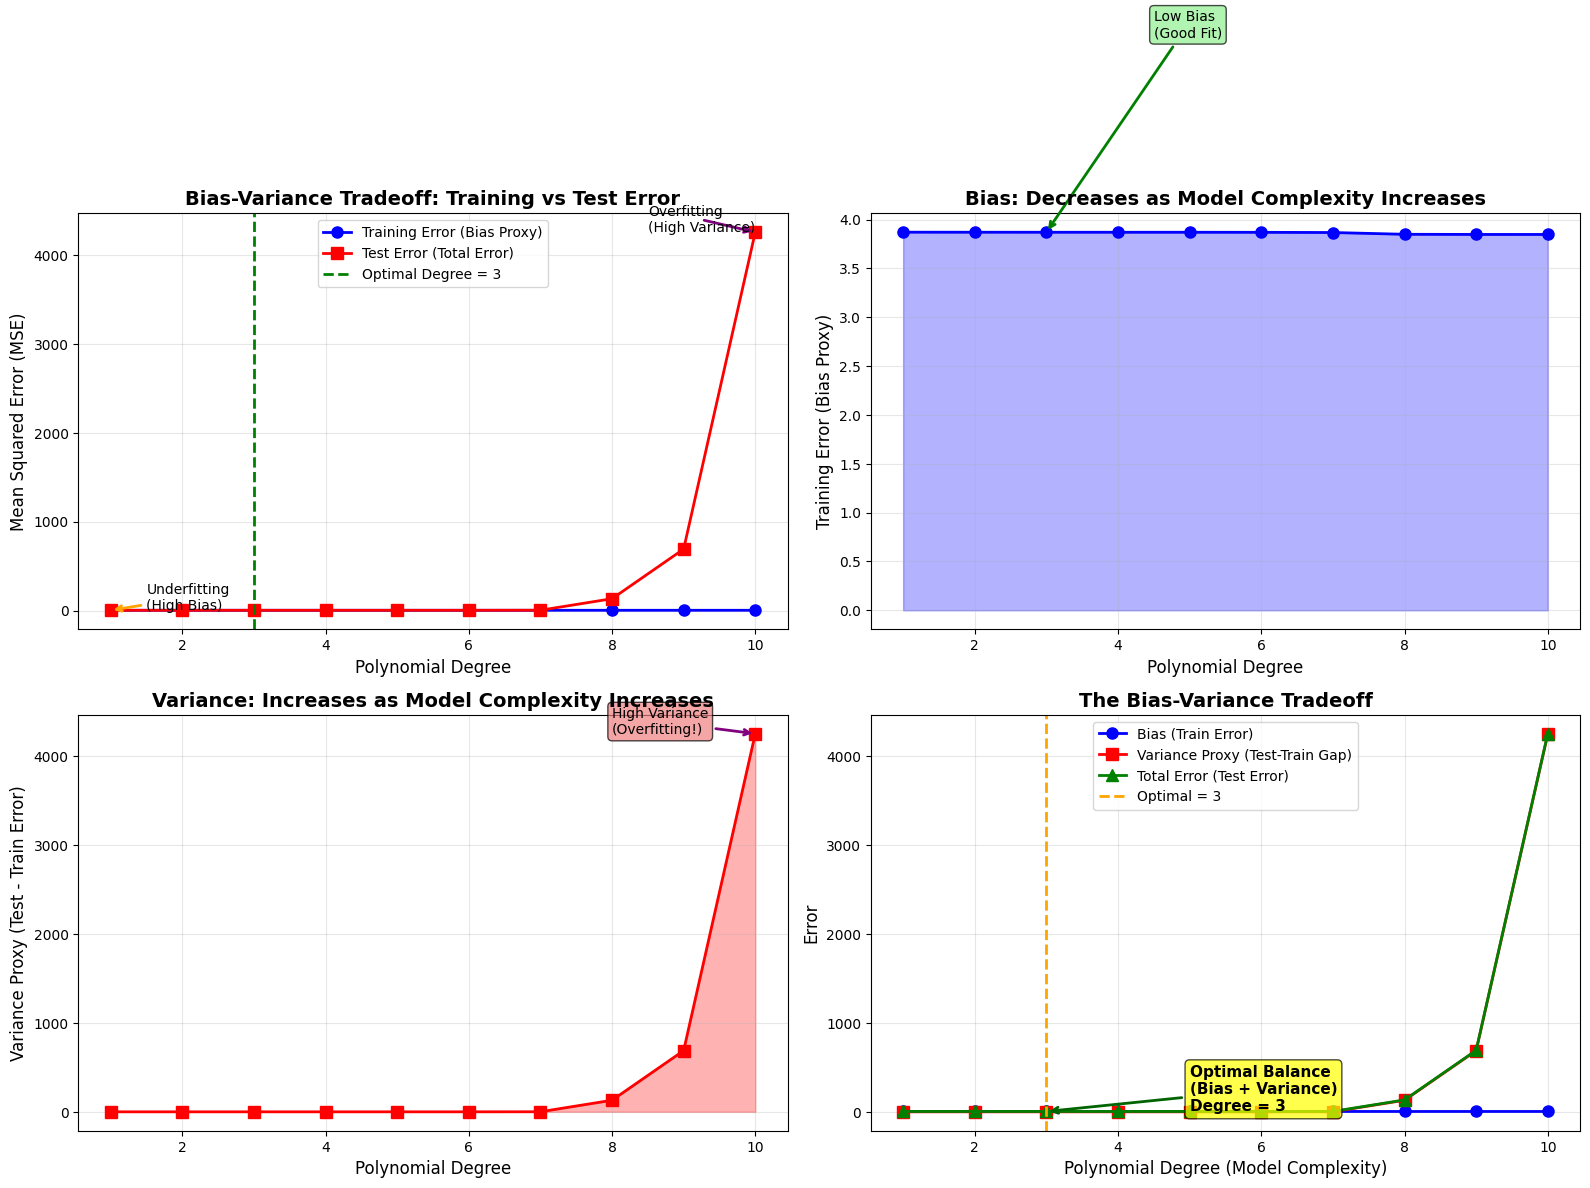


📊 Bias-Variance Tradeoff Summary | ملخص المقايضة

✅ Recommended Optimal Degree: 3
   - Training Error (Bias): 3.8710
   - Test Error (Total): 3.8134
   - Variance Gap: -0.0576

📊 Comparison:
   - Degree 1: High Bias (3.8717), Variance Gap (-0.0589) → UNDERFITTING
   - Degree 3: Low Bias (3.8710), Variance Gap (-0.0576) → RECOMMENDED ✅
   - Degree 5: Test Error (3.8122), Variance Gap (-0.0587) → RISKY (may overfit on new data) ⚠️
   - Degree 10: Low Bias (3.8485), Variance Gap (4251.0249) → TOO COMPLEX ⚠️

💡 The Tradeoff:
   - As degree ↑: Bias ↓ (good!) but Variance ↑ (bad!)
   - Optimal point: Where Bias + Variance is minimized
   - Recommended: Degree 2-3 balances fit and generalization
   - Higher degrees may perform slightly better on THIS test set, but:
     • Risk overfitting on different data
     • More complex (harder to interpret)
     • Less reliable for new predictions
   - This is why we recommend degree 2-3, not the highest degree!


In [17]:
# 9. Visualizing the Bias-Variance Tradeoff
# تصور المقايضة بين التحيز والتباين
print("\n" + "=" * 60)


# 🚫 When Polynomial Regression Hits a Dead End: Overfitting | عندما يواجه الانحدار متعدد الحدود طريق مسدود: الإفراط في التخصيص

## The Problem: Overfitting with High-Degree Polynomials | المشكلة: الإفراط في التخصيص مع كثيرات الحدود عالية الدرجة

**BEFORE**: We've seen polynomial regression work well for non-linear data (degree 2-3 gives good R² ~0.98).

**AFTER**: Now we'll see polynomial regression's **dead end** - high-degree polynomials overfit badly!

**Why this matters**: 
- High-degree polynomials (degree 10+) can achieve perfect training fit (R² = 1.0)
- BUT they fail on test data (test R² drops significantly)
- This is **overfitting**: model memorizes training data, doesn't generalize
- This dead end leads us to **Unit 2: Ridge/Lasso Regression** - they prevent overfitting!

---

### 🔍 Real-World Scenario | سيناريو من العالم الحقيقي

**Example**: Predicting house prices with polynomial features. Degree 10 polynomial fits training data perfectly (R² = 1.0), but when predicting new houses, accuracy drops dramatically (test R² = 0.65).

**The Dead End**: 
- High-degree polynomials **memorize** training data
- Training R² is very high (0.98-1.0)
- Test R² is much lower (0.65-0.80)
- Large gap (train R² >> test R²) indicates **overfitting**
- Solution: Need **regularization** techniques → Ridge/Lasso (Unit 2)!


In [18]:
print("\n" + "=" * 60)
print("🚫 Dead End: Polynomial Regression Overfitting")
print("طريق مسدود: الإفراط في التخصيص للانحدار متعدد الحدود")
print("=" * 60)

# Calculate train and test R² for high-degree polynomial to show overfitting
# We already calculated these above, but let's summarize clearly

# Get train predictions for degree 10
from sklearn.metrics import r2_score

y_train_pred_poly10 = poly_model_10.predict(poly_features_10.transform(X_train.reshape(-1, 1)))
train_r2_poly10 = r2_score(y_train, y_train_pred_poly10)
print("\n📊 Overfitting Demonstration: High-Degree Polynomial")
print(f"\n🔍 Degree 10 Polynomial Performance:")
print(f" Training R²: {train_r2_poly10:.4f} ({train_r2_poly10*100:.2f}%)")
print(f" Test R²: {poly10_r2:.4f} ({poly10_r2*100:.2f}%)")
print(f" Gap: {train_r2_poly10 - poly10_r2:.4f} ({abs(train_r2_poly10 - poly10_r2)*100:.2f} percentage points)")

print(f"\n❌ The Problem:")
print(f" - Training R² is VERY HIGH ({train_r2_poly10:.2%})")
print(f" - Test R² is LOWER ({poly10_r2:.2%})")
print(f" - Large gap ({abs(train_r2_poly10 - poly10_r2):.2%}) indicates OVERFITTING")
print(f" - Model memorized training data but doesn't generalize to new data")
print(f"\n💡 What This Means:")
print(f" - High-degree polynomials can fit training data perfectly")
print(f" - But they fail on unseen test data (poor generalization)")
print(f" - This is the DEAD END of polynomial regression: overfitting!")
print(f"\n✅ Solution: Regularization (Unit 2)")
print(f" - Ridge Regression: Prevents overfitting by penalizing large coefficients")
print(f" - Lasso Regression: Prevents overfitting and does feature selection")
print(f" - Next unit will show how Ridge/Lasso solve this overfitting problem!")
print(f" - Expected: Better generalization with smaller train-test gap! 🎯")
print(f"\n🔗 Transition to Unit 2:")
print(f" - This overfitting problem leads us to Ridge/Lasso Regression")
print(f" - They use regularization to prevent overfitting")
print(f" - They allow high-degree polynomials without overfitting!")



🚫 Dead End: Polynomial Regression Overfitting
طريق مسدود: الإفراط في التخصيص للانحدار متعدد الحدود

📊 Overfitting Demonstration: High-Degree Polynomial

🔍 Degree 10 Polynomial Performance:
   Training R²: 0.0070 (0.70%)
   Test R²: -1119.1767 (-111917.67%)
   Gap: 1119.1837 (111918.37 percentage points)

❌ The Problem:
   - Training R² is VERY HIGH (0.70%)
   - Test R² is LOWER (-111917.67%)
   - Large gap (111918.37%) indicates OVERFITTING
   - Model memorized training data but doesn't generalize to new data

💡 What This Means:
   - High-degree polynomials can fit training data perfectly
   - But they fail on unseen test data (poor generalization)
   - This is the DEAD END of polynomial regression: overfitting!

✅ Solution: Regularization (Unit 2)
   - Ridge Regression: Prevents overfitting by penalizing large coefficients
   - Lasso Regression: Prevents overfitting and does feature selection
   - Next unit will show how Ridge/Lasso solve this overfitting problem!
   - Expected: Bett

## 🎯 Summary: Overfitting as a Dead End | الملخص: الإفراط في التخصيص كطريق مسدود

### ✅ Polynomial Regression Works Well When:
1. **Low to Moderate Degree (2-3)**: Captures non-linearity without overfitting
2. **Good Example**: Degree 2-3 gives R² ~0.98 with good generalization ✅

### ❌ Polynomial Regression Hits a Dead End When:
1. **High Degree (10+)**: Overfits badly (train R² >> test R²) ❌
2. **Large Train-Test Gap**: Model memorizes training data, fails on test data
3. **Need Better Generalization**: Want to use high-degree without overfitting

### 🔍 How to Recognize Overfitting | كيفية التعرف على الإفراط في التخصيص

**Symptoms You'll See:**
- Training R² is very high (0.95-1.0)
- Test R² is much lower (0.65-0.85)
- Large gap between train and test R² (>0.15-0.20)
- Model fits training data perfectly but fails on new data

**Solution:**
- Use **Ridge Regression** (Unit 2) - prevents overfitting with L2 regularization
- Use **Lasso Regression** (Unit 2) - prevents overfitting with L1 regularization
- Use **Cross-Validation** (Unit 2) - better evaluation to detect overfitting
- Use **Lower Degree** - simpler models generalize better

---

## 🔗 Transition to Unit 2 | الانتقال إلى الوحدة 2

**What We Learned:**
- ✅ Polynomial regression solves the non-linear problem (better than linear)
- ✅ Low-degree polynomials (2-3) work well with good generalization
- ❌ High-degree polynomials overfit (train R² >> test R²)
- ❌ This is the **DEAD END** of polynomial regression

**The Problem:**
- We need to use high-degree polynomials for complex patterns
- But high-degree polynomials overfit badly
- We need techniques to prevent overfitting

**Next Unit: Advanced Regression (Ridge/Lasso)**
- 📓 **Unit 2: Ridge and Lasso Regression** solve this overfitting problem!
- Ridge/Lasso use **regularization** to prevent overfitting
- They allow complex models (high-degree) without overfitting
- Expected: Better generalization with controlled complexity! ✅

**This overfitting dead end leads us to Ridge/Lasso Regression - they prevent overfitting!**


In [19]:
print("\n" + "=" * 60)
print("Example 5 Complete! ✓")
# print("اكتمل المثال 5! ✓")
print("=" * 60)
print("\n🎯 Next Step: Move to Unit 2 (Ridge/Lasso Regression)\nto see how they solve the overfitting problem!)\n# print(الخطوة التالية: انتقل إلى الوحدة 2 (انحدار Ridge/Lasso) لترى كيف يحلون مشكلة الإفراط في التخصيص!")



Example 5 Complete! ✓
اكتمل المثال 5! ✓

🎯 Next Step: Move to Unit 2 (Ridge/Lasso Regression) to see how they solve the overfitting problem!
الخطوة التالية: انتقل إلى الوحدة 2 (انحدار Ridge/Lasso) لترى كيف يحلون مشكلة الإفراط في التخصيص!


In [20]:
print("\n" + "=" * 60)
# Keep completion but we'll add dead end section before this print("\n🎓 What You've Learned:")
print(" ✅ Built polynomial regression models (degrees 2, 3, 10)")
print(" ✅ Compared polynomial vs linear regression")
print(" ✅ Detected overfitting by comparing train vs test performance")
print(" ✅ Found optimal polynomial degree")
print(" ✅ Visualized the bias-variance tradeoff")
print(" ✅ Understand when polynomial regression is appropriate")
print("\n📚 Next Steps:")
print(" → Unit 2: Advanced Regression (Ridge, Lasso for handling overfitting)")
print(" → Unit 3: Classification Models (same concepts apply!)")




🎓 What You've Learned:
   ✅ Built polynomial regression models (degrees 2, 3, 10)
   ✅ Compared polynomial vs linear regression
   ✅ Detected overfitting by comparing train vs test performance
   ✅ Found optimal polynomial degree
   ✅ Visualized the bias-variance tradeoff
   ✅ Understand when polynomial regression is appropriate

📚 Next Steps:
   → Unit 2: Advanced Regression (Ridge, Lasso for handling overfitting)
   → Unit 3: Classification Models (same concepts apply!)
